* Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
* Decision TRee generates model, which is like questions & help getting data classified
* Non-parametric model, takes
* Binary splitting makes this very efficient, each question is intended to split the tree into half.
* Trick is to identify the right question to ask
* axis-aligned splits in the data

In [1]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

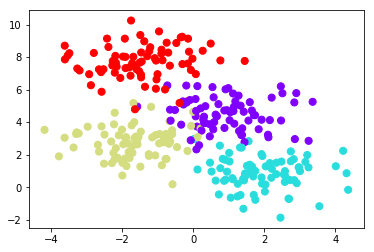

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(X[:,0],X[:,1], c = y,s=50,cmap='rainbow')

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(max_depth=5).fit(X,y)

In [24]:
X_test,y_test = make_blobs(n_samples=30000, centers=4, random_state=0, cluster_std=2.0)

In [25]:
y_pred = tree.predict(X_test)

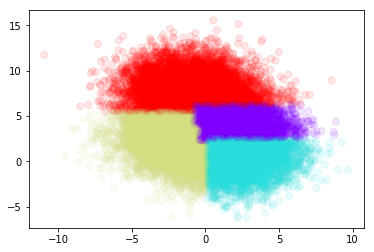

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.scatter(X[:,0],X[:,1], c = y,s=50,cmap='rainbow')
plt.scatter(X_test[:,0],X_test[:,1], c = y_pred,s=50,cmap='rainbow',alpha=0.1)

In [27]:
import sklearn.tree as sktree

In [28]:
sktree.export_graphviz(tree,out_file='tree.dot')
#http://www.webgraphviz.com/

In [29]:
X[0]

array([ 0.02458305,  2.96215652])

In [30]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1,
       0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2,
       3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3,
       2])

In [31]:
tree.tree_.max_depth

5

In [22]:
#Decison trees get into the case of overfitting

### Ensemble learning
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

* averaging methods / bagging methods - find base estimators params & avgs them out to give one estimator. Examples: Bagging methods, Forests of randomized trees

* boosting methods - Cut down bias. Examples: AdaBoost, Gradient Tree Boosting

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original', data_home='.')

In [3]:
#image is of 28 X 28
mnist.data.shape

(70000, 784)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
trainX,testX,trainY,testY = train_test_split(mnist.data,mnist.target)

In [8]:
tree = DecisionTreeClassifier().fit(trainX,trainY)

In [9]:
from sklearn.metrics import accuracy_score
pred = tree.predict(testX)
print (accuracy_score(testY,pred))

0.866914285714


In [10]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
#n_estimators - num of decision trees used to create a forest
random_forest = RandomForestClassifier(n_estimators=40)

In [11]:
random_forest.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
random_forest.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
pred = random_forest.predict(testX)
print (accuracy_score(testY,pred))

0.964228571429


In [16]:
#Random Forest is useful in finding feature importances
random_forest.feature_importances_.shape

(784,)

In [50]:
adaboost = AdaBoostClassifier(n_estimators=40)

In [51]:
adaboost.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=40, random_state=None)

In [52]:
pred = adaboost.predict(testX)
print (accuracy_score(testY,pred))

0.703085714286


In [58]:
from sklearn.linear_model import SGDClassifier
adaboost = AdaBoostClassifier(SGDClassifier(loss='hinge'),n_estimators=40,algorithm='SAMME')

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [59]:
adaboost.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=40, random_state=None)

In [60]:
pred = adaboost.predict(testX)
print (accuracy_score(testY,pred))

0.848914285714


In [61]:
random_forest.feature_importances_

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.01592477e-06,   1.04307040e-06,
         1.57034537e-06,   2.01599701e-06,   1.01123389e-05,
         3.87085185e-06,   1.93737764e-06,   4.35814908e-06,
         2.28510920e-06,   6.50185197e-06,   8.01506596e-06,
         2.08938438e-06,   0.00000000e+00,   1.01824077e-06,
         7.93856331e-07,